In [1]:
!pip install pillow==9.5.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 MB 14.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pillow: filename=Pillow-9.5.0-cp312-cp312-linux_x86_64.whl size=1210268 sha256=73a4b3dc6aa4eaae93d8f3263a0afc815cc07dab41ded433bfa5cf49ca174d65
  Stored in directory: /root/.cache/pip/wheels/ea/de/2e/75a6399e5d8cd3a55c13c8f0658d996d4ce4cff37389de044c
Successfully built pillow
  Attempting uninstall: pillow
    Found existing installation: pillow 11.3.0
    Uninstalling pillow-11.3.0:
      Successfully uninstalled pillow-11.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-image 0.25.2 requires pillow>=10.1, but you have pillow 9.5.0 which is incompatible.


In [2]:
!git clone https://github.com/caijiayou/yolov9_v1.git

Cloning into 'yolov9_v1'...
remote: Enumerating objects: 135, done.
remote: Counting objects: 100% (135/135), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 135 (delta 45), reused 135 (delta 45), pack-reused 0 (from 0)
Receiving objects: 100% (135/135), 2.09 MiB | 14.85 MiB/s, done.
Resolving deltas: 100% (45/45), done.


In [3]:
import os
# 更改資料夾名稱
os.rename("yolov9_v1", "yolov9")

In [4]:
# 進入yolov9資料夾並安裝相關套件
%cd yolov9
!pip install -r requirements.txt
%cd

/content/yolov9
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 81.0 MB/s eta 0:00:00
/root


In [5]:
# 下載預訓練權重
!mkdir /content/yolov9/weight
!wget -O /content/yolov9/weight/yolov9-c.pt https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt

--2026-01-31 08:49:43--  https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/759338070/c8ca43f2-0d2d-4aa3-a074-426505bfbfb1?sp=r&sv=2018-11-09&sr=b&spr=https&se=2026-01-31T09%3A33%3A40Z&rscd=attachment%3B+filename%3Dyolov9-c.pt&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2026-01-31T08%3A32%3A57Z&ske=2026-01-31T09%3A33%3A40Z&sks=b&skv=2018-11-09&sig=pmNNY19Bf1HjaSuB072NaSHIr3Z2bNoNuiImw3so1hU%3D&jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNvbnRlbnQuY29tIiwia2V5Ijoia2V5MSIsImV4cCI6MTc2OTg1MTE4MywibmJmIjoxNzY5ODQ5MzgzLCJwYXRoIjoicmVsZWFzZWFzc2V0cHJvZHVjdGlvbi5ibG9iLmNvcm

In [6]:
# 測試
%cd /content/yolov9

!python detect_dual.py --weights /content/yolov9/weight/yolov9-c.pt\
--conf 0.75\
--source /content/yolov9/data/images/horses.jpg\
--device 0

/content/yolov9
detect_dual: weights=['/content/yolov9/weight/yolov9-c.pt'], source=/content/yolov9/data/images/horses.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.75, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLO 🚀 f8fcab5 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 604 layers, 50880768 parameters, 0 gradients, 237.6 GFLOPs
image 1/1 /content/yolov9/data/images/horses.jpg: 448x640 3 horses, 92.0ms
Speed: 0.5ms pre-process, 92.0ms inference, 158.9ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


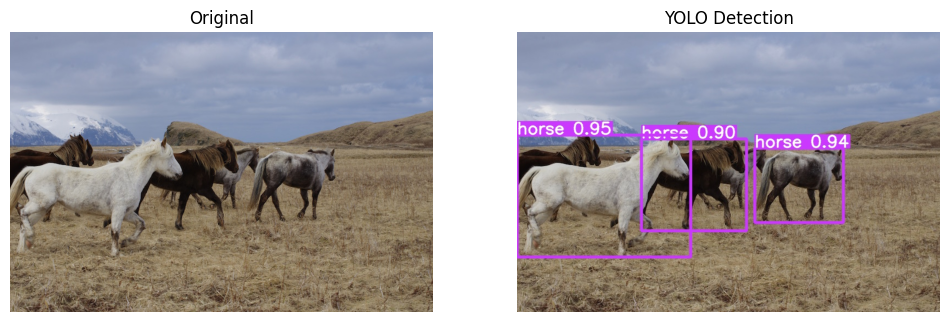

In [13]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('/content/yolov9/data/images/horses.jpg')
image_yolo = cv2.imread('/content/yolov9/runs/detect/exp/horses.jpg')

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_yolo = cv2.cvtColor(image_yolo, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_yolo)
plt.title('YOLO Detection')
plt.axis('off')

plt.show()